# Importing the dependencies 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, file I/O 
import os # for file hierarchy 
import matplotlib.pyplot as plt # plotting the images and data
import matplotlib.image as mpimg # reading the images
from  sklearn.model_selection import train_test_split # for preprocessing and cutting whole dataset into train and test subsets
from PIL import Image
import cv2
import glob

# Getting the dataset in list.

In [2]:
dirpath = '../input/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages'
files = next(os.walk(dirpath))
# print(files)
dogs = next(os.walk(dirpath +'/Dog'))
cats = next(os.walk(dirpath +'/Cat'))
dogs = dogs[2]
cats = cats[2]

# Counting the number of images in dataset

In [3]:
print(f'The number of dogs images is {len(dogs)}')
print(f'The number of cat images is {len(cats)}')
print(f'Total number of images in dataset is {len(cats) + len(dogs)}')

The number of dogs images is 12470
The number of cat images is 12491
Total number of images in dataset is 24961


# Cutting the dataset into smaller set

In [4]:
dogs = dogs[:3000]
cats = cats[:3000]
print(f'The number of dogs images after cutting is {len(dogs)}')
print(f'The number of cat images after cutting is {len(cats)}')
print(f'Total number of images in dataset is {len(cats) + len(dogs)}')

The number of dogs images after cutting is 3000
The number of cat images after cutting is 3000
Total number of images in dataset is 6000


# Displaying the sample Images

In [ ]:
%matplotlib inline
img = mpimg.imread(f'{dirpath}/Dog/{dogs[2]}')
imgplot = plt.imshow(img)

In [ ]:
%matplotlib inline
img = mpimg.imread(f'{dirpath}/Cat/{cats[2]}')
imgplot = plt.imshow(img)

# Resizing the images

In [7]:
# creating a saparate folder
import shutil

if os.path.isdir('./resized'):
    path = './resized'
    shutil.rmtree(path)
os.mkdir('./resized')
os.mkdir('./resized/dog')
os.mkdir('./resized/cat')

## Resizing the dog images

In [8]:
resized_dog_path = './resized/dog'
resized_cat_path = './resized/cat'
c = 0

for i in range(3000):
    oImg = f'{dirpath}/Dog/{dogs[i]}'
    img = Image.open(oImg)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img.save(f'{resized_dog_path}/{c}.jpg')
    c+=1
print('completed resizing for dogs')

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


completed resizing for dogs


## Resizing the cat images

In [9]:
c = 0
for i in range(3000):
    oImg = f'{dirpath}/Cat/{cats[i]}'
    img = Image.open(oImg)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img.save(f'{resized_cat_path}/{c}.jpg')
    c+=1
print('completed resizing for cats')

completed resizing for cats


# Original image

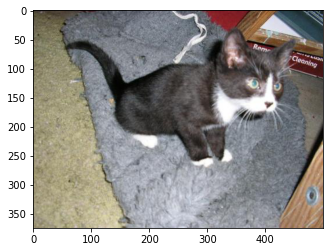

In [10]:
%matplotlib inline
img = mpimg.imread(f'{dirpath}/Cat/{cats[2]}')
imgplot = plt.imshow(img)

# Resized Image

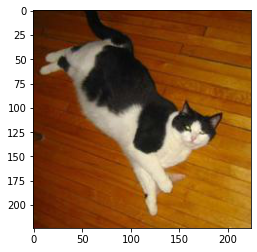

In [11]:
%matplotlib inline
img = mpimg.imread(f'{resized_cat_path}/4.jpg')
imgplot = plt.imshow(img)

# Creating labels for dataset

In [12]:
# cats -> 0 
# dogs -> 1
resized_dogs = os.listdir('./resized/dog')
labels=[]
for i in resized_dogs:
    labels.append(1)
resized_cats = os.listdir('./resized/cat')
for i in resized_cats:
    labels.append(0)

# Finding the unique value and count of individual subsets

In [13]:
val , cnt = np.unique(labels,return_counts=True)
print(f'The value is {val[0]} and count of that is {cnt[0]}')
print(f'The value is {val[1]} and count of that is {cnt[1]}')

The value is 0 and count of that is 3000
The value is 1 and count of that is 3000


# Creating a numpy array of all the images present

In [14]:
allImgPath = './resized/dog/'
img_extension = ['png','jpg']
files = []

[files.extend(glob.glob(allImgPath + '*.' + e)) for e in img_extension]
allImgPath = './resized/cat/'
[files.extend(glob.glob(allImgPath + '*.' + e)) for e in img_extension]

allImg = np.asarray([cv2.imread(file) for file in files])

# Getting information from numpy array 'allImg' that consist all the images in matrix form

In [15]:
print(allImg.shape)
print(allImg.dtype)
print(type(allImg))
print(len(allImg))

(6000, 224, 224, 3)
uint8
<class 'numpy.ndarray'>
6000


# Train test split

In [16]:
X = allImg
Y = np.asarray(labels)

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# Getting the insights of train test split

In [18]:
print (f'The X images are splitted into train set : {len(x_train)} test set : {len(x_test)}')
print (f'The Y labels are splitted into train set : {len(y_train)} test set : {len(y_test)}')
print(x_train[0])

The X images are splitted into train set : 5400 test set : 600
The Y labels are splitted into train set : 5400 test set : 600
[[[127 132 147]
  [148 153 168]
  [150 157 172]
  ...
  [103 107 102]
  [ 86  97  89]
  [121 134 126]]

 [[147 152 167]
  [124 129 144]
  [139 146 161]
  ...
  [100 104  99]
  [ 95 106  98]
  [139 152 144]]

 [[160 165 180]
  [129 134 149]
  [170 177 192]
  ...
  [ 97 101  96]
  [ 85  95  89]
  [124 136 130]]

 ...

 [[170 163 170]
  [196 190 195]
  [206 199 206]
  ...
  [ 57  58  78]
  [ 69  71  89]
  [102 104 122]]

 [[218 211 216]
  [241 234 237]
  [233 226 231]
  ...
  [ 68  72  91]
  [ 84  91 108]
  [102 109 124]]

 [[233 226 229]
  [230 223 226]
  [221 212 215]
  ...
  [ 82  88 107]
  [104 112 129]
  [126 135 149]]]


# scaling the data by dividing with 255

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
print(x_train[0])

[[[0.49803922 0.51764706 0.57647059]
  [0.58039216 0.6        0.65882353]
  [0.58823529 0.61568627 0.6745098 ]
  ...
  [0.40392157 0.41960784 0.4       ]
  [0.3372549  0.38039216 0.34901961]
  [0.4745098  0.5254902  0.49411765]]

 [[0.57647059 0.59607843 0.65490196]
  [0.48627451 0.50588235 0.56470588]
  [0.54509804 0.57254902 0.63137255]
  ...
  [0.39215686 0.40784314 0.38823529]
  [0.37254902 0.41568627 0.38431373]
  [0.54509804 0.59607843 0.56470588]]

 [[0.62745098 0.64705882 0.70588235]
  [0.50588235 0.5254902  0.58431373]
  [0.66666667 0.69411765 0.75294118]
  ...
  [0.38039216 0.39607843 0.37647059]
  [0.33333333 0.37254902 0.34901961]
  [0.48627451 0.53333333 0.50980392]]

 ...

 [[0.66666667 0.63921569 0.66666667]
  [0.76862745 0.74509804 0.76470588]
  [0.80784314 0.78039216 0.80784314]
  ...
  [0.22352941 0.22745098 0.30588235]
  [0.27058824 0.27843137 0.34901961]
  [0.4        0.40784314 0.47843137]]

 [[0.85490196 0.82745098 0.84705882]
  [0.94509804 0.91764706 0.92941176]


# building a neural network

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

In [22]:
mobilenet_model = '../input/tensorflow/'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

2022-10-14 13:03:41.613852: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [25]:
model.fit(x_train,y_train, epochs=5)

2022-10-14 13:03:48.929722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
169/169 [==============================] - 50s 298ms/step - loss: 0.0514 - acc: 0.9830
Epoch 3/5
169/169 [==============================] - 50s 296ms/step - loss: 0.0400 - acc: 0.9856
Epoch 4/5
169/169 [==============================] - 51s 300ms/step - loss: 0.0342 - acc: 0.9893
Epoch 5/5
169/169 [==============================] - 50s 297ms/step - loss: 0.0310 - acc: 0.9896


In [26]:
score , acc = model.evaluate(x_test,y_test)

19/19 [==============================] - 8s 343ms/step - loss: 0.0485 - acc: 0.9850


In [27]:
print(f'Accuracy of test dataset is : {int(acc*100)} %')

Accuracy of test dataset is : 98 %


# prediction of unidentified image

In [28]:
def predictAnimal(str):   
    input_image = mpimg.imread(str)
    imgplot = plt.imshow(input_image)
    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize/255
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)
    print(input_prediction)
    if input_pred_label == 0:
      print('The image represents a Cat')
    else:
      print('The image represents a Dog')

[[-1.2855395  2.3051362]]
The image represents a Dog


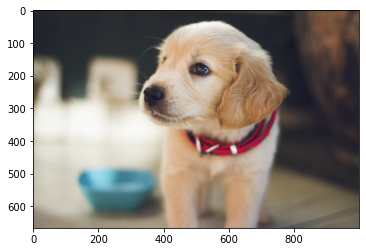

In [29]:
predictAnimal('../input/inputset/dog.jpg')

[[ 4.214672 -4.787567]]
The image represents a Cat


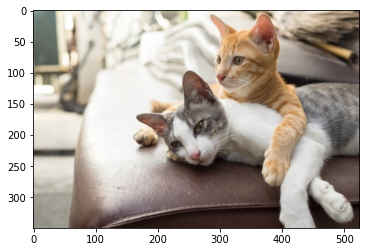

In [30]:
predictAnimal('../input/inputset/2cats.jpg')

[[-0.26246905 -1.4749064 ]]
The image represents a Cat


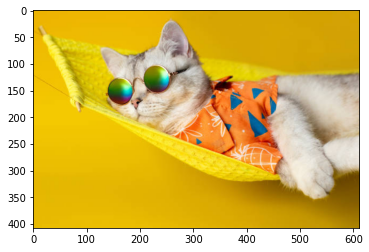

In [31]:
predictAnimal('../input/inputset/cat.jpg')